In [ ]:
# Import libraries
import keras
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Read Dataset
data = np.load('./ORL_faces.npz')

x_train = data['trainX']
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

y_train= data['trainY']
y_test= data['testY']

In [ ]:
x_train, x_valid, y_train, y_valid= train_test_split(x_train, y_train, test_size=.2, random_state=12)

In [ ]:
img_shape=(112, 92, 1)

x_train = x_train.reshape(x_train.shape[0], *img_shape)
x_test = x_test.reshape(x_test.shape[0], *img_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *img_shape)

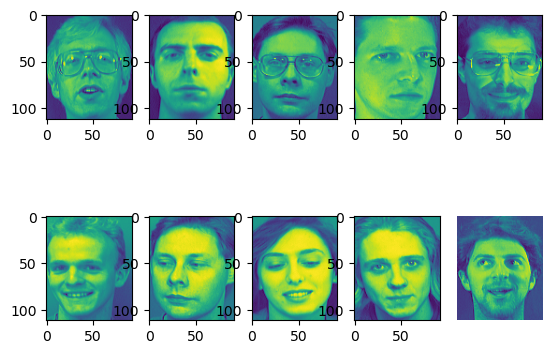

In [ ]:
# Visualize few images
fig, axs = plt.subplots(2, 5)

for i in range(10):
  r = (i//5)
  c = (i%5)
  axs[r, c].imshow(x_train[i])

plt.axis("off")
plt.show()

In [ ]:
# Build CNN model
inputs = Input(shape=(112,92,1))
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=inputs.shape)(inputs)
x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same')(x)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',)(x)
x = MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(20, activation = "softmax")(x)
CNN_model = keras.Model(inputs, x)

In [ ]:
CNN_model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 112, 92, 1)]      0         
                                                                 
 conv2d_55 (Conv2D)          (None, 112, 92, 32)       320       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 56, 46, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 56, 46, 32)        9248      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 28, 23, 32)       0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 20608)             0  

In [ ]:
# Train model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = CNN_model.fit(x_train, y_train, batch_size=10, epochs=30,verbose=2,validation_data=(x_valid,y_valid))

Epoch 1/30
20/20 - 2s - loss: 3.1589 - accuracy: 0.0833 - val_loss: 2.9783 - val_accuracy: 0.1667 - 2s/epoch - 119ms/step
Epoch 2/30
20/20 - 1s - loss: 2.8777 - accuracy: 0.3542 - val_loss: 2.7703 - val_accuracy: 0.3333 - 1s/epoch - 71ms/step
Epoch 3/30
20/20 - 1s - loss: 2.2063 - accuracy: 0.5156 - val_loss: 1.9637 - val_accuracy: 0.4375 - 1s/epoch - 73ms/step
Epoch 4/30
20/20 - 1s - loss: 0.9919 - accuracy: 0.8438 - val_loss: 0.8080 - val_accuracy: 0.7708 - 1s/epoch - 73ms/step
Epoch 5/30
20/20 - 1s - loss: 0.2777 - accuracy: 0.9688 - val_loss: 0.2983 - val_accuracy: 0.9792 - 1s/epoch - 74ms/step
Epoch 6/30
20/20 - 1s - loss: 0.0741 - accuracy: 0.9948 - val_loss: 0.1530 - val_accuracy: 1.0000 - 1s/epoch - 75ms/step
Epoch 7/30
20/20 - 2s - loss: 0.0244 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 1.0000 - 2s/epoch - 96ms/step
Epoch 8/30
20/20 - 1s - loss: 0.0133 - accuracy: 1.0000 - val_loss: 0.0460 - val_accuracy: 1.0000 - 1s/epoch - 70ms/step
Epoch 9/30
20/20 - 2s - loss: 0

In [ ]:
# Evaluate the model to check if its performance >90%
test_scores = CNN_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Test loss: 0.2442891150712967
Test accuracy: 0.9375


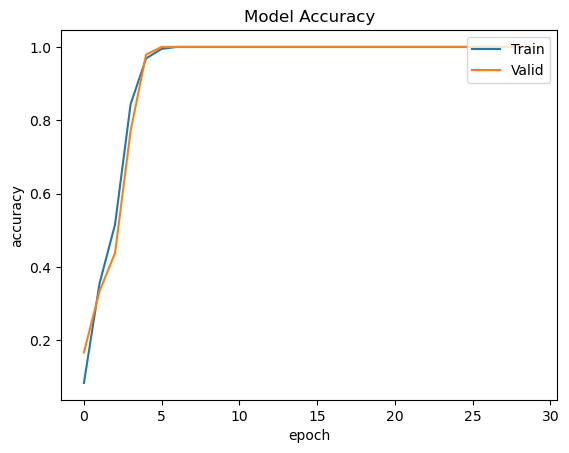

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

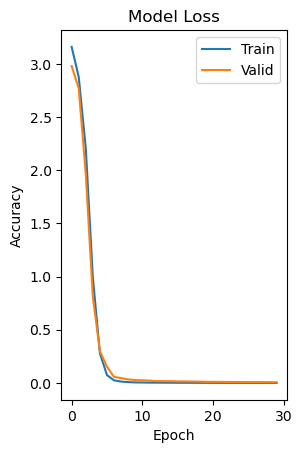

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()